**DATA PRE-PROCESSING**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/Food demand.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,3,157,2760,233.83,231.83,0,0,149
1,100,104,2956,486.03,583.03,0,0,161
2,143,75,1971,328.86,327.86,0,0,149
3,41,24,2539,145.53,145.53,0,0,540
4,45,83,2539,95.06,120.34,0,0,271


In [ ]:
dataset.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   week                   1999 non-null   int64  
 1   center_id              1999 non-null   int64  
 2   meal_id                1999 non-null   int64  
 3   checkout_price         1999 non-null   float64
 4   base_price             1999 non-null   float64
 5   emailer_for_promotion  1999 non-null   int64  
 6   homepage_featured      1999 non-null   int64  
 7   num_orders             1999 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 125.1 KB


**SOME VISUALIZATIONS** 

In [ ]:
df=dataset.drop(["week","id","center_id","meal_id"], axis=1)
df

KeyError: ignored

In [ ]:
df.corr()
fig = plt.figure(figsize = (7,7))
sns.heatmap(df.corr(), annot = True)

NameError: ignored

Text(0, 0.5, 'no_of_orders')

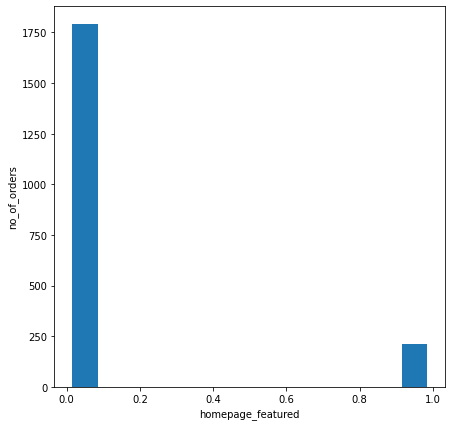

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.hist(df['homepage_featured'], rwidth=0.7)
plt.xlabel('homepage_featured')
plt.ylabel('no_of_orders')

Text(0, 0.5, 'no_of_orders')

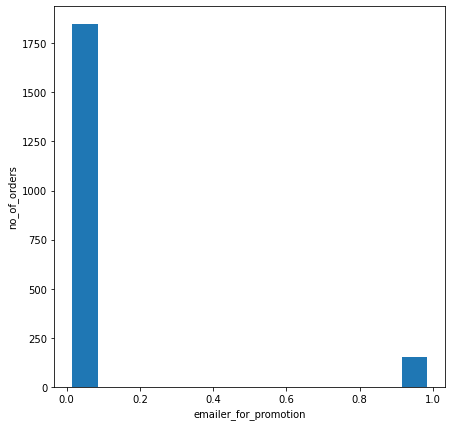

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.hist(df['emailer_for_promotion'], rwidth=0.7)
plt.xlabel('emailer_for_promotion')
plt.ylabel('no_of_orders')

Text(0, 0.5, 'no_of_orders')

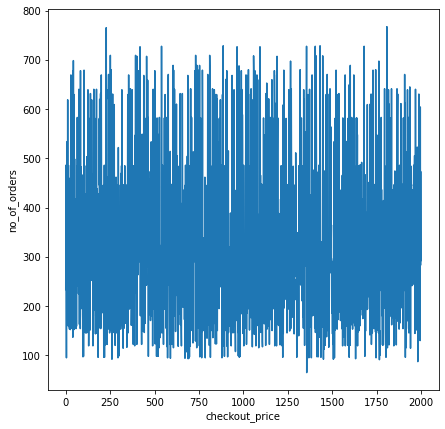

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.plot(dataset['checkout_price'])
plt.xlabel('checkout_price')
plt.ylabel('no_of_orders')

**SPLITTING THE DATA INTO TRAINING AND TEST DATASETS**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)


In [ ]:
len(X_train)

1599

In [ ]:
len(X_test)

400

**XGBoost**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgreg=XGBRegressor()

In [ ]:
xgreg.fit(X_train,y_train)

[16:38:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred=xgreg.predict(X_test)

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


In [ ]:
xgreg.predict([1000003,200,104,2539,400,405,0,1])

array([200.15], dtype=float32)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.41067388056347465

**RANDOM FOREST REGRESSION**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3429296937458063